In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import pandas as pd
import copy

## Model corruption

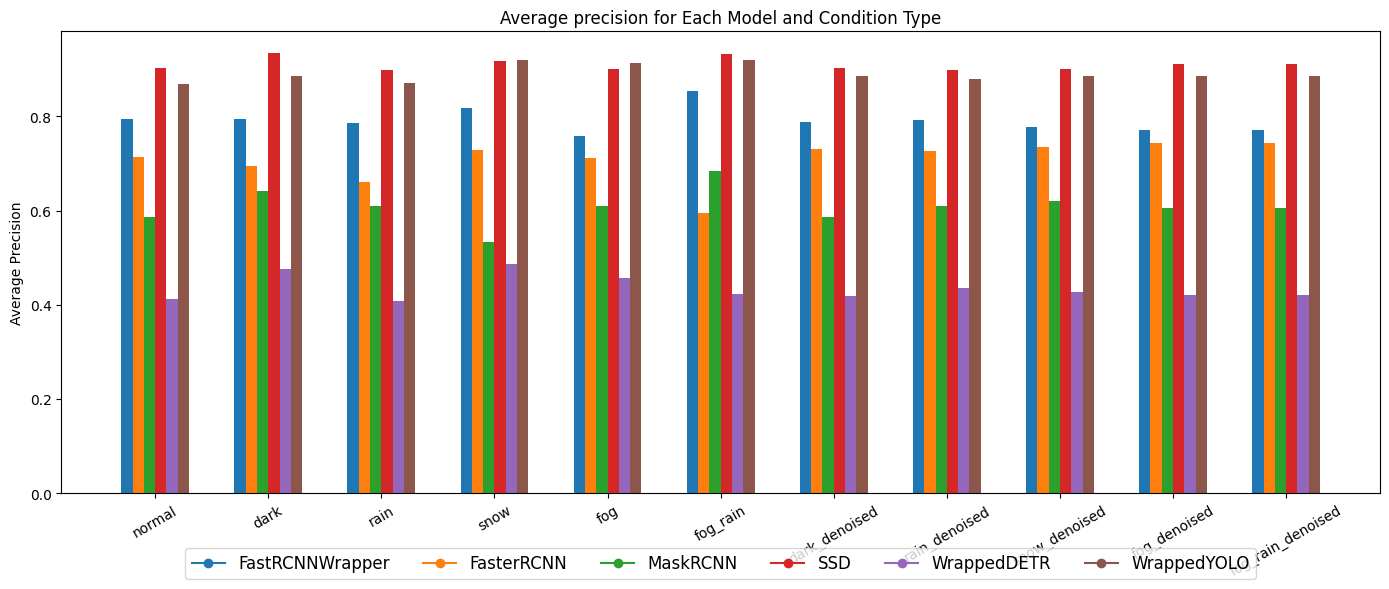

In [2]:
import numpy as np

# Load JSON data
with open('eval_result_200_denoised.json', 'r') as f:
    data = json.load(f)

models = list(data.keys())
corruptions = ['normal'] + [c for c in data[models[0]].keys() if c not in ['normal_precision', 'normal_recall', 'normal_TP', 'normal_FP', 'normal_FN', 'F1_score', 'mean_IoU']]  # Add 'clean' at start

# Assign consistent colors to models
model_names = list(data.keys())
colors = plt.colormaps.get_cmap('tab10')
# colors = plt.cm.get_cmap('tab10', len(model_names))
model_color_map = {model: colors(i) for i, model in enumerate(model_names)}

# Create a single legend outside the subplots
handles = [plt.Line2D([0], [0], color=model_color_map[model], marker='o', linestyle='-', label=model)
           for model in model_names]


bar_width = 0.1
x = np.arange(len(corruptions))

plt.figure(figsize=(14, 6))

for i, model in enumerate(models):
    # Gather mAPs: clean_mAP first, then corrupted_mAPs
    mAPs = [data[model]['normal_precision']] + [data[model][c]['precision'] for c in corruptions[1:]]
    # Plot all corrupted bars (except clean) with default color
    plt.bar(x + i * bar_width, mAPs, width=bar_width, label=model)

plt.xticks(x + bar_width * (len(models)-1)/2, corruptions, rotation=30)
plt.ylabel('Average Precision')
plt.title('Average precision for Each Model and Condition Type')
plt.legend(handles=handles,
           loc='upper center',
           bbox_to_anchor=(0.5, -0.10),
           ncol=len(models),
           fontsize='large',
           frameon=True)
plt.tight_layout()
plt.show()

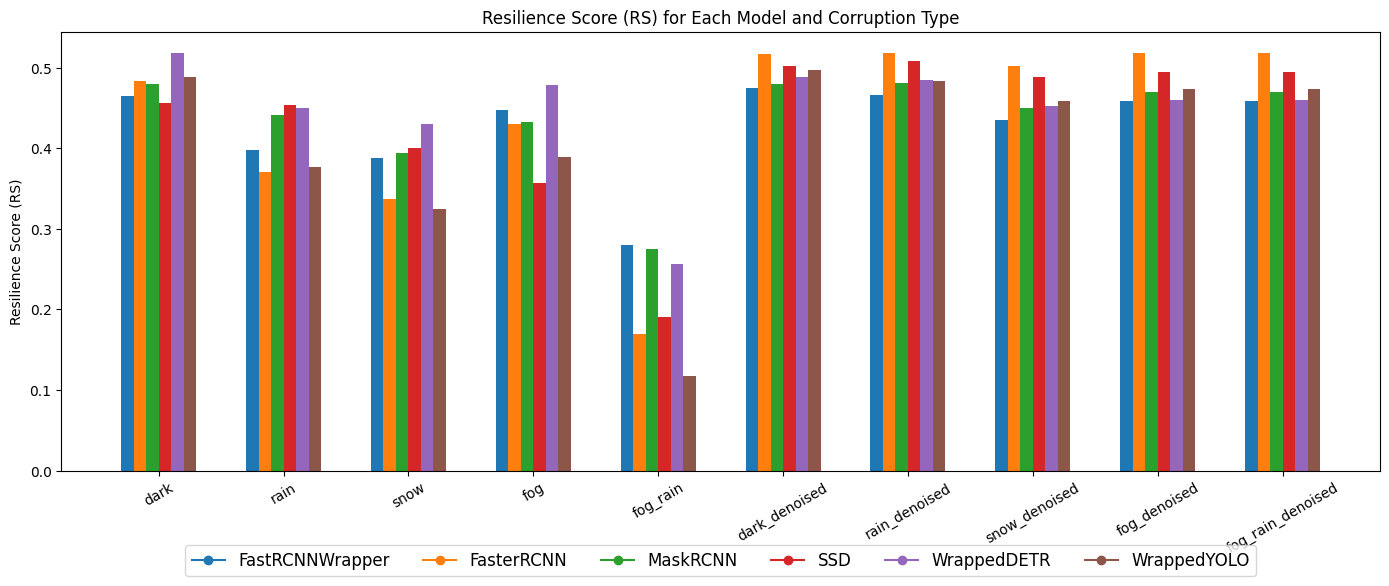

In [3]:

# Load JSON data
with open('eval_result_200_denoised.json', 'r') as f:
    data = json.load(f)

models = list(data.keys())
corruptions = [c for c in data[models[0]].keys() if c not in ['normal_precision', 'normal_recall', 'normal_TP', 'normal_FP', 'normal_FN', 'F1_score', 'mean_IoU']]  # Add 'clean' at start


bar_width = 0.1
x = np.arange(len(corruptions))

plt.figure(figsize=(14, 6))

for i, model in enumerate(models):
    if model == "RCNN":
        continue
    RSs = [data[model][c]['RS'] for c in corruptions]
    plt.bar(x + i * bar_width, RSs, width=bar_width, label=model)

plt.xticks(x + bar_width * (len(models)-1)/2, corruptions, rotation=30)
plt.ylabel('Resilience Score (RS)')
plt.title('Resilience Score (RS) for Each Model and Corruption Type')

plt.legend(handles=handles,
           loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=len(models),
           fontsize='large',
           frameon=True)

plt.tight_layout()
plt.show()

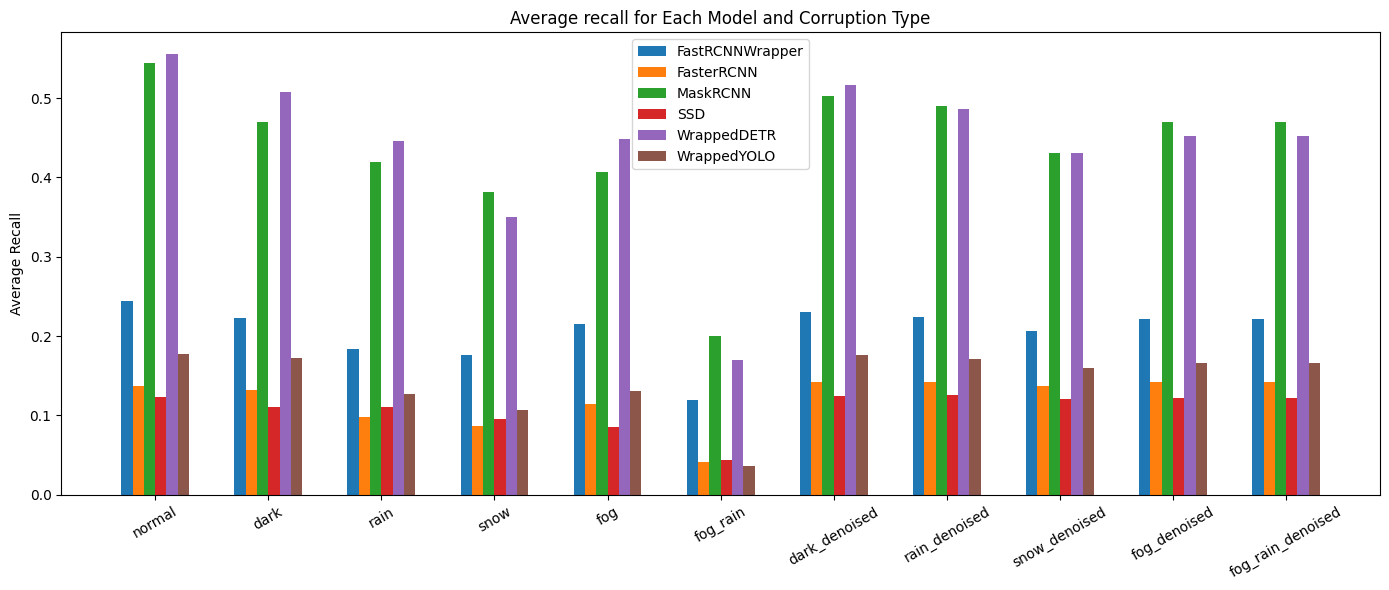

In [4]:
import numpy as np

# Load JSON data
with open('eval_result_200_denoised.json', 'r') as f:
    data = json.load(f)

models = list(data.keys())
corruptions = ["normal"] + [c for c in data[models[0]].keys() if c not in ['normal_precision', 'normal_recall', 'normal_TP', 'normal_FP', 'normal_FN', 'F1_score', 'mean_IoU']]  # Add 'clean' at start


bar_width = 0.1
x = np.arange(len(corruptions))

plt.figure(figsize=(14, 6))

for i, model in enumerate(models):
    cr = [data[model]['normal_recall']] + [data[model][c]['recall'] for c in corruptions[1:]]
    plt.bar(x + i * bar_width, cr, width=bar_width, label=model)

plt.xticks(x + bar_width * (len(models)-1)/2, corruptions, rotation=30)
plt.ylabel('Average Recall')
plt.title('Average recall for Each Model and Corruption Type')
plt.legend()
plt.tight_layout()
plt.show()

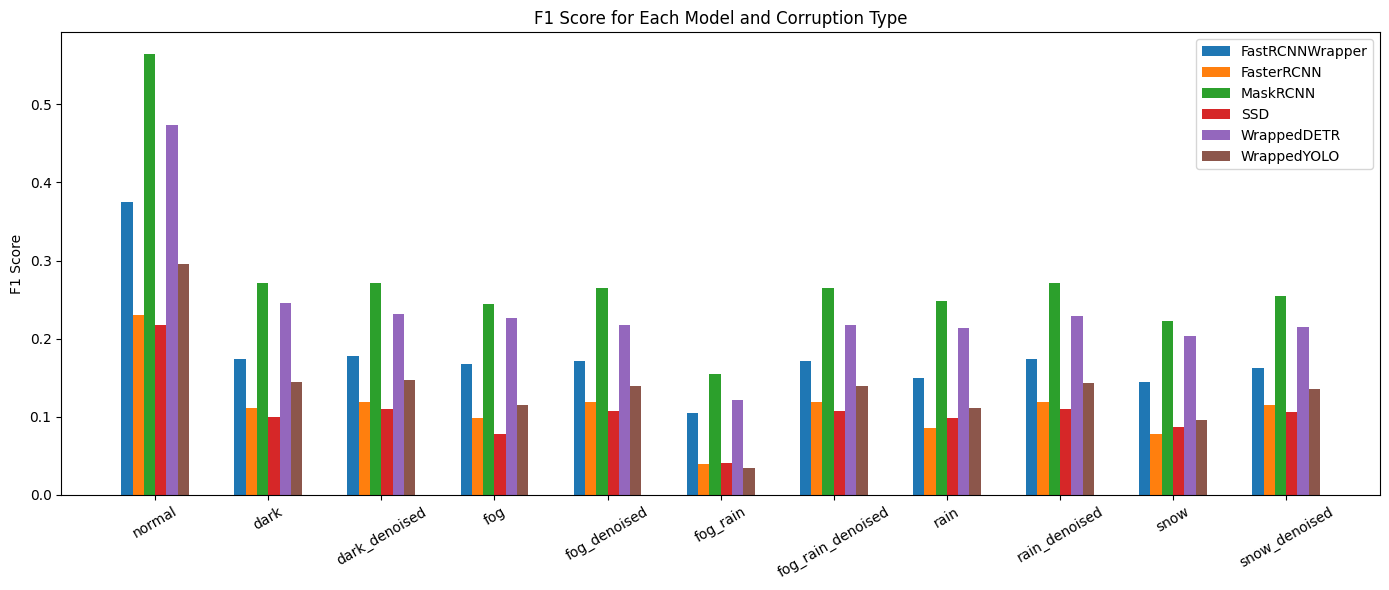

In [5]:
import numpy as np

# Load JSON data
with open('eval_result_200_denoised.json', 'r') as f:
    data = json.load(f)

models = list(data.keys())

corruptions = [c for c in data[models[0]].keys() if c not in ['normal_precision', 'normal_recall', 'normal_TP', 'normal_FP', 'normal_FN', 'F1_score', 'mean_IoU']]
corruptions.sort()
corruptions = ["normal"] + corruptions

bar_width = 0.1
x = np.arange(len(corruptions))

plt.figure(figsize=(14, 6))

for i, model in enumerate(models):
    f1 = [data[model]['F1_score']] + [data[model][c]['F1_score'] for c in corruptions[1:]]
    f1 = [i if i != "NaN" else 0 for i in f1]
    plt.bar(x + i * bar_width, f1, width=bar_width, label=model)

plt.xticks(x + bar_width * (len(models)-1)/2, corruptions, rotation=30)
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Model and Corruption Type')
plt.legend()
plt.tight_layout()
plt.show()

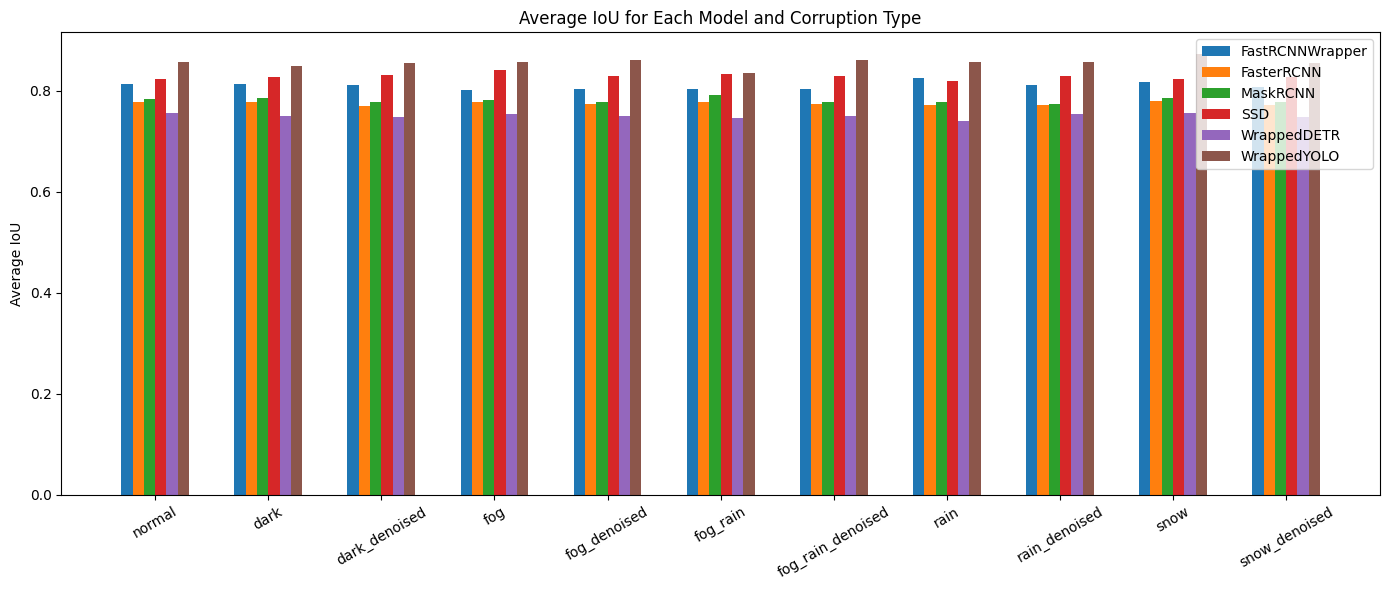

In [6]:
import numpy as np

# Load JSON data
with open('eval_result_200_denoised.json', 'r') as f:
    data = json.load(f)

models = list(data.keys())

corruptions = [c for c in data[models[0]].keys() if c not in ['normal_precision', 'normal_recall', 'normal_TP', 'normal_FP', 'normal_FN', 'F1_score', 'mean_IoU']]
corruptions.sort()
corruptions = ["normal"] + corruptions

bar_width = 0.1
x = np.arange(len(corruptions))

plt.figure(figsize=(14, 6))

for i, model in enumerate(models):
    f1 = [data[model]['mean_IoU']] + [data[model][c]['IoU'] for c in corruptions[1:]]
    f1 = [i if i != "NaN" else 0 for i in f1]
    plt.bar(x + i * bar_width, f1, width=bar_width, label=model)

plt.xticks(x + bar_width * (len(models)-1)/2, corruptions, rotation=30)
plt.ylabel('Average IoU')
plt.title('Average IoU for Each Model and Corruption Type')
plt.legend()
plt.tight_layout()
plt.show()

In [8]:

def load_json_to_dataframe(json_path):
    with open(json_path, 'r') as f:
        data = json.load(f)

    all_records = []

    for model_name, model_data in data.items():
        for condition, condition_data in model_data.items():
            if condition_data == None:
                continue
            for entry in condition_data:
                entry_copy = copy.deepcopy(entry)
                entry_copy["model"] = model_name
                entry_copy["condition"] = condition
                all_records.append(entry_copy)


    df = pd.DataFrame(all_records)
    return df

# Example usage
json_file_path = 'eval_per_class_result_200_denoised.json'  # Replace with your actual file path
df = load_json_to_dataframe(json_file_path)
df


,category_id,category_name,TP,FP,FN,Precision,Recall,Mean IoU@0.50 (TP only),TP matched count,model,condition
0,2,bicycle,14,5,29,0.7368,0.3256,0.7982,14,FastRCNNWrapper,clean
1,3,bus,4,5,19,0.4444,0.1739,0.9111,4,FastRCNNWrapper,clean
2,4,car,183,34,439,0.8433,0.2942,0.8399,183,FastRCNNWrapper,clean
3,6,motorcycle,11,3,35,0.7857,0.2391,0.7485,11,FastRCNNWrapper,clean
4,1,person,73,25,352,0.7449,0.1718,0.8044,73,FastRCNNWrapper,clean
...,...,...,...,...,...,...,...,...,...,...,...
391,3,bus,5,2,18,0.7143,0.2174,0.8808,5,WrappedYOLO,fog_rain_denoised
392,4,car,145,14,477,0.9119,0.2331,0.8789,145,WrappedYOLO,fog_rain_denoised
393,6,motorcycle,2,0,44,1.0000,0.0435,0.8462,2,WrappedYOLO,fog_rain_denoised
394,1,person,47,8,378,0.8545,0.1106,0.8258,47,WrappedYOLO,fog_rain_denoised


In [9]:
df1 = df.drop("category_id",
              inplace=False,
              axis="columns").drop("TP matched count",
                                   inplace=False,
                                   axis="columns").fillna(0).groupby(["category_name", "model", "condition"]).agg({
    "TP": "sum",
    "FP": "sum",
    "FN": "sum",
    "Precision": "mean",
    "Recall": "mean",
    "Mean IoU@0.50 (TP only)": "mean"
})
df1

TP  FP   FN  Precision  \
category_name model           condition                                   
bicycle       FastRCNNWrapper clean              14   5   29     0.7368   
                              dark               12   8   31     0.6000   
                              dark_denoised      13   5   30     0.7222   
                              fog                 9   5   34     0.6429   
                              fog_denoised       12   5   31     0.7059   
...                                              ..  ..  ...        ...   
truck         WrappedYOLO     fog_rain_denoised   7   2  104     0.7778   
                              rain                5   3  106     0.6250   
                              rain_denoised       6   4  105     0.6000   
                              snow                3   2  108     0.6000   
                              snow_denoised       7   3  104     0.7000   

                                                 Recall  \
category_name model           condition                   
bicycle       FastRCNNWrapper clean              0.3256   
                              dark               0.2791   
                              dark_denoised      0.3023   
                              fog                0.2093   
                              fog_denoised       0.2791   
...                                                 ...   
truck         WrappedYOLO     fog_rain_denoised  0.0631   
                              rain               0.0450   
                              rain_denoised      0.0541   
                              snow               0.0270   
                              snow_denoised      0.0631   

                                                 Mean IoU@0.50 (TP only)  
category_name model           condition                                   
bicycle       FastRCNNWrapper clean                               0.7982  
                              dark                                0.7634  
                              dark_denoised                       0.7755  
                              fog                                 0.7536  
                              fog_denoised                        0.7529  
...                                                                  ...  
truck         WrappedYOLO     fog_rain_denoised                   0.7835  
                              rain                                0.8125  
                              rain_denoised                       0.7663  
                              snow                                0.8471  
                              snow_denoised                       0.7931  

[396 rows x 6 columns]

In [ ]:
df1.to_excel('output32.xlsx', index=True)